In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [3]:
mu0=4*np.pi*10**(-7)
R=0.0705 #[m] este es el promedio del radio interno y externo
N=10

## **Variación de campo magnético en función de la distancia**

In [4]:
#Corriente fija de 1.48 A
z=[0,1,2,3,4,5,6,7,8,9,10,11,12,13] #cm
zm=np.array([0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13]) #[m]]
B_1=np.array([0.182,0.172,0.157,0.142,0.131,0.117,0.107,0.098,0.091,0.086,0.081,0.079,0.077,0.069]) #[mT]
mT_to_T = 1e-3
B_1_T = [value * mT_to_T for value in B_1]


In [5]:
I_0=1.50 #[A]
def Bz(distancia):
    return (mu0*I_0*R**2 * N)/(2*(distancia**2 + R**2)**(3/2))

In [6]:
zzz=np.linspace(0,0.13,10000)

In [7]:
B_0=6.1e-5 #background en [T]
B_1_TB=[]
for k in B_1_T:
    B_1_TB.append([k-B_0]) #[ Campo magéntico menos background en T]

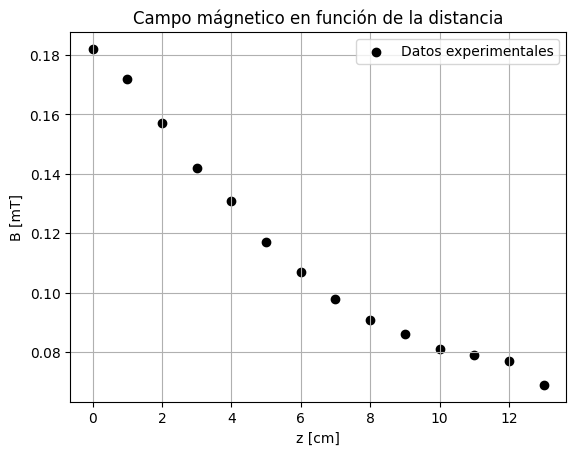

In [8]:
plt.scatter(z,B_1,color="black",label="Datos experimentales")
plt.xlabel("z [cm]");plt.ylabel("B [mT]")
plt.grid()
plt.title("Campo mágnetico en función de la distancia")
plt.legend()

In [10]:
print(B_1_TB)

[[0.00012100000000000001], [0.00011099999999999999], [9.6e-05], [8.099999999999999e-05], [7.000000000000002e-05], [5.600000000000001e-05], [4.6e-05], [3.700000000000001e-05], [3.0000000000000004e-05], [2.499999999999999e-05], [2.0000000000000005e-05], [1.7999999999999997e-05], [1.6000000000000003e-05], [8.000000000000011e-06]]


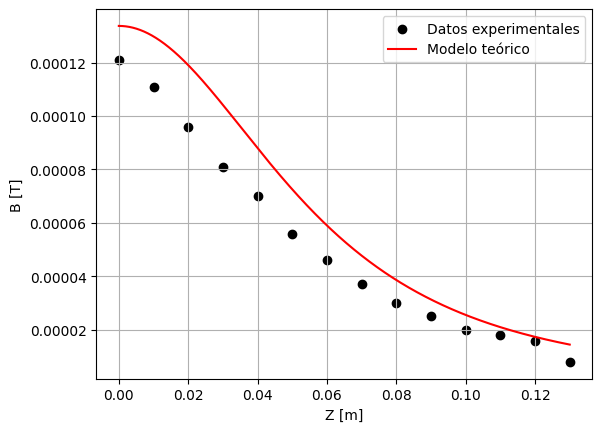

In [9]:

plt.scatter(zm,B_1_TB,color="black",label="Datos experimentales")
plt.plot(zzz,Bz(zzz),color="red",label="Modelo teórico")
plt.xlabel("Z [m]");plt.ylabel("B [T]")
plt.grid()
plt.legend()


## **Variación de campo magnético en función de la corriente en el origen**

In [11]:
B_1=[0.073,0.075,0.080,0.096,0.116,0.130,0.137,0.159,0.165,0.169,0.182,0.190,0.198,0.205,0.209,0.217,0.231] # [mT]

B_00=0.061
Bmt=[]
for k in B_1:
    Bmt.append([k-B_00])
B_11 = np.array([7.30e-05, 7.50e-05, 8.00e-05, 9.60e-05, 1.16e-04, 1.30e-04,
                      1.37e-04, 1.59e-04, 1.65e-04, 1.69e-04, 1.82e-04, 1.90e-04,
                      1.98e-04, 2.05e-04, 2.09e-04, 2.17e-04, 2.31e-04]) #[T]

I_T=np.array([0.09,0.15,0.20,0.41,0.65,0.84,0.94,1.12,1.25,1.33,1.51,1.62,1.73,1.80,1.90,1.95,2.01]) #[A]

B_0=6.1e-5 #background en [T]
B_111=[]
for k in B_11:
    B_111.append([k-B_0]) #[ Campo magéntico menos background en T]


######## Modelo teórico sacado con biotsavart

def Besp(I):
    return (mu0*I*N)/(2*R)

In [12]:
print(Bmt)

[[0.011999999999999997], [0.013999999999999999], [0.019000000000000003], [0.035], [0.05500000000000001], [0.069], [0.07600000000000001], [0.098], [0.10400000000000001], [0.10800000000000001], [0.121], [0.129], [0.137], [0.144], [0.148], [0.156], [0.17]]


<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\ELXMA\AppData\Local\Temp\ipykernel_17020\2452659541.py:2: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(I_T,Besp(I_T),color="red",label="$B(I)=\mu_0IN/2R$")
C:\Users\ELXMA\AppData\Local\Temp\ipykernel_17020\2452659541.py:3: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(I_T,8.10*10**(-5)*I_T,color="blue",label="$B(I)=8.10$ $\\times$ $10^{-5}\cdot I$")


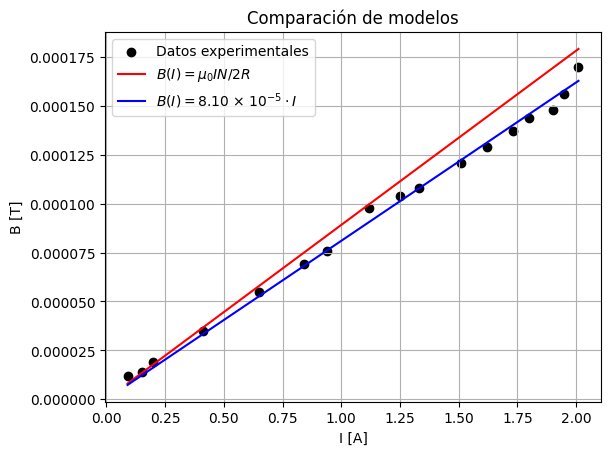

In [29]:
plt.scatter(I_T,B_111, color="black",label="Datos experimentales")
plt.plot(I_T,Besp(I_T),color="red",label="$B(I)=\mu_0IN/2R$")
plt.plot(I_T,8.10*10**(-5)*I_T,color="blue",label="$B(I)=8.10$ $\\times$ $10^{-5}\cdot I$")
plt.grid()
plt.xlabel("I [A]");plt.ylabel("B [T]")
plt.title("Comparación de modelos")
plt.legend()

Ploteo de datos con background

In [30]:
def calcular_correlacion(lista1, lista2):
    if len(lista1) != len(lista2):
        raise ValueError("Las listas deben tener la misma longitud.")
    
    # Convertir a arrays de numpy para facilitar el cálculo
    array1 = np.array(lista1)
    array2 = np.array(lista2)
    
    # Calcular la correlación usando numpy
    correlacion = np.corrcoef(array1, array2)[0, 1]
    return correlacion



resultado = calcular_correlacion(Besp(I_T),8.10*10**(-5)*I_T)
print(f"La correlación entre las dos listas es: {resultado}")


La correlación entre las dos listas es: 0.9999999999999999


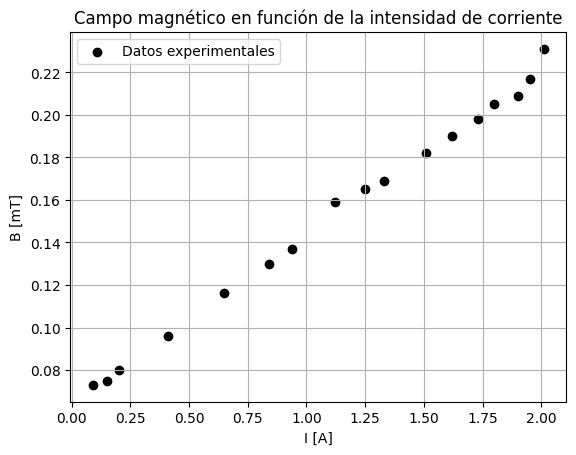

In [17]:
plt.grid()
plt.scatter(I_T,B_1,color="black",label="Datos experimentales")
plt.ylabel("B [mT]");plt.xlabel("I [A]")
plt.title("Campo magnético en función de la intensidad de corriente")

plt.legend()



## **ddsd**


El valor de chi-cuadrado es: 1.6773025770629073
El valor de chi cuadrado reducido es: 0.12902327515868517


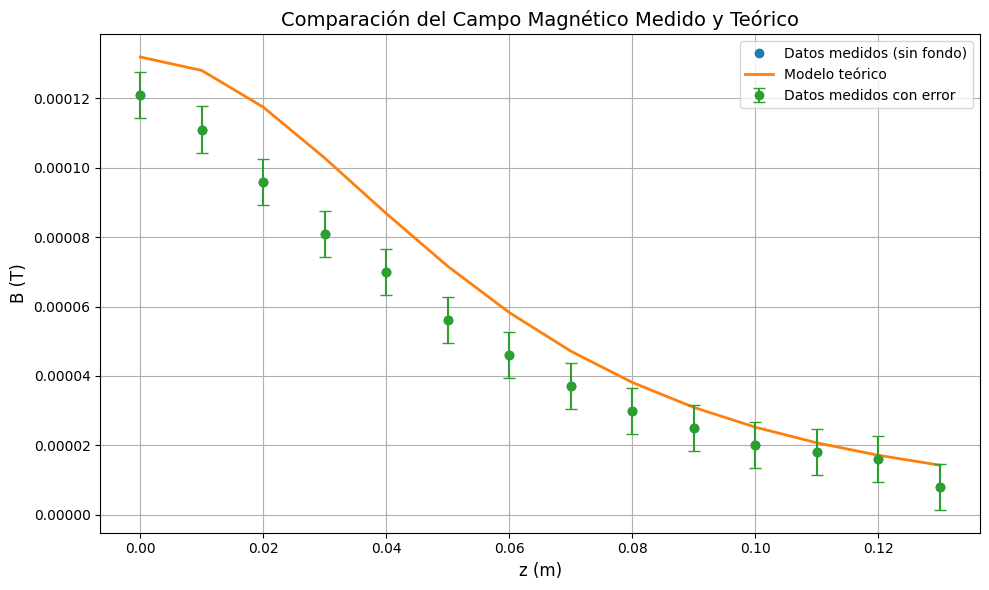

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
z = np.array([0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13])  # [m]
B_1_T = np.array([0.182, 0.172, 0.157, 0.142, 0.131, 0.117, 0.107, 0.098, 0.091, 0.086, 0.081, 0.079, 0.077, 0.069]) * 1e-3  # [T]
B_0 = 6.1e-5  # Campo magnético de fondo [T]

# Ajustar los datos para quitar el fondo
B_1_TB = np.array([k - B_0 for k in B_1_T])  # [Campo magnético menos background en T]

# Parámetros físicos
mu0 = 4 * np.pi * 10**(-7)  # [T·m/A]
R = 0.0705  # [m]
N = 10
I = 1.48  # [A]



# Campo teórico
B_teorico = (mu0 * N * I * R**2) / (2 * (R**2 + z**2)**(3/2))

# Calcular las diferencias entre valores medidos y teóricos
diferencias = B_1_TB - B_teorico

# Calcular la desviación estándar de las diferencias
sigma = np.std(diferencias, ddof=1)  # ddof=1 para obtener la desviación estándar muestral

# Cálculo de chi-cuadrado
chi2 = np.sum(((B_1_TB - B_teorico) ** 2) / ((0.037* 1e-3)  **2))

# Cálculo del chi cuadrado reducido
n = len(B_1_TB)  # Número de datos
chi_R2 = chi2 / (n - 1)  # Restar 1 para los grados de libertad

# Imprimir resultados
print(f"El valor de chi-cuadrado es: {chi2}")
print(f"El valor de chi cuadrado reducido es: {chi_R2}")

# Graficar los datos medidos y el modelo teórico
plt.figure(figsize=(10, 6))
plt.plot(z, B_1_TB, 'o', label='Datos medidos (sin fondo)', markersize=6)
plt.plot(z, B_teorico, label='Modelo teórico', linewidth=2)
plt.errorbar(z, B_1_TB, yerr=sigma, fmt='o', label='Datos medidos con error', capsize=4)
plt.xlabel('z (m)', fontsize=12)
plt.ylabel('B (T)', fontsize=12)
plt.title('Comparación del Campo Magnético Medido y Teórico', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
# Lista original proporcionada por el usuario
original_list = [71,63,54,43,33,44,61,74,59,52,47,41,66,59,69,49,75,45,54,68,55,97,54,98,126,76,101,102,116,126,49,48,126,45,49,48,126,89,101,115,34,93,44,91,34,82,97,116,101,34,93,44,91,55,93,44,91,34,82,101,115,101,114,118,101,34,93,44,91,34,78,111,110,101,34,93,44,91,34,84,111,116,97,108,95,115,97,109,112,108,101,115,34,93,44,91,53,48,49,93,44,91,34,69,120,112,32,73,68,34,93,44,91,34,50,48,50,52,45,49,48,45,48,52,32,48,57,58,50,49,58,48,54,46,51,53,53,54,55,56,34,93]

# Transformando cada valor en su forma decimal correspondiente dividiendo por 1000
new_list = [x / 1000 for x in original_list]



In [43]:
# Lista original proporcionada por el usuario
original_listt = [91,53,54,53,93,44,91,34,49,52,126,49,126,49,126,49,126,35,54,98,49,97,54,98,126,76,101,102,116,126,49,48,126,45,49,48,126,89,101,115,34,93,44,91,34,82,97,116,101,34,93,44,91,55,93,44,91,34,82,101,115,101,114,118,101,34,93,44,91,34,78,111,110,101,34,93,44,91,34,84,111,116,97,108,95,115,97,109,112,108,101,115,34,93,44,91,53,48,49,93,44,91,34,69,120,112,32,73,68,34,93,44,91,34,50,48,50,52,45,49,48,45,48,52,32,48,57,58,50,49,58,48,54,46,51,53,53,54,55,56,34,93]

# Transformando cada valor en su forma decimal correspondiente dividiendo por 1000
new_listt = [x / 1000 for x in original_list]


In [59]:
time=np.linspace(0,60,len(new_list))

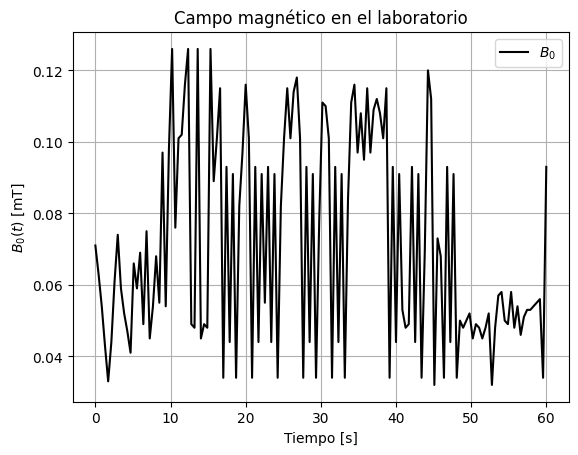

In [62]:
plt.plot(time,new_listt,label="$B_0$",color="black")
plt.xlabel("Tiempo [s]");plt.ylabel("$B_0(t)$ [mT]")
plt.grid()
plt.title("Campo magnético en el laboratorio")
plt.legend()

(array([1., 4., 3., 6., 2., 4., 2., 0., 0., 2.]),
 array([0.033 , 0.0395, 0.046 , 0.0525, 0.059 , 0.0655, 0.072 , 0.0785,
        0.085 , 0.0915, 0.098 ]),
 <BarContainer object of 10 artists>)

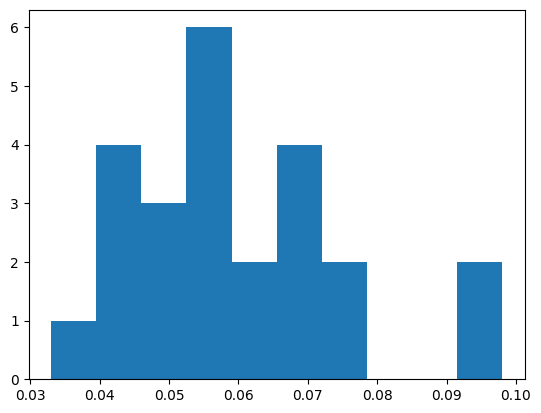

In [37]:
plt.hist(new_list)